In [633]:

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt 

In [634]:
df = pd.read_excel('/content/asbl_data_analyst_interview_assignment_netflix (1).xlsx')
df

,Type,Title,Director,Cast,Country,Release_year,Genres
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2007,"Cult Movies, Dramas, Thrillers"
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,2018,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2009,"Comedies, Horror Movies"
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,"Children & Family Movies, Comedies"


## Task at Hand 
1. Load the dataset in your environment.
2. Perform EDA (exploratory data analysis) on the dataset.
3. Plot some meaningful graphs here which convey some insights and those insights businesses can use to further increase their revenue and attract more customers.
4. Find answers to the below questions from this dataset.

- a. Which are the top 5 directors who produce most of the movies only?

- b. Which are the top 5 genres which are liked by people or here liking means listed on the portal of Netflix (you can find a count for each genre and list the top 5 genres) for movies and TV shows?

- c. Which 2 directors should Netflix collaborate with more based on the increase in their movies or tv shows over the past years? [OPTIONAL]

- d. Which are the top 10 actors who are liked by people and have the most content on the Netflix OTT platform.

- e. Which 2 actors should Netflix collaborate with more based on the increase in their movies or tv shows over the past years? [OPTIONAL]


## Exploratory Data Analysis

In [635]:
# BASIC DESCRIPTION OF THE DATASET 
df.describe(include=object)

,Type,Title,Director,Cast,Country,Genres
count,8807,8807,6173,7982,7976,8807
unique,2,8807,4528,7692,748,514
top,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"Dramas, International Movies"
freq,6131,1,19,19,2818,362


In [636]:
# TO COUNT THE NULL VALUES IN THE DATASET 
df.isnull().sum()

Type               0
Title              0
Director        2634
Cast             825
Country          831
Release_year       0
Genres             0
dtype: int64

In [637]:
# TO CHECK THE NUMBER OF DUPLICATES IN THE DATASET
df.duplicated().sum()

0

In [638]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type          8807 non-null   object
 1   Title         8807 non-null   object
 2   Director      6173 non-null   object
 3   Cast          7982 non-null   object
 4   Country       7976 non-null   object
 5   Release_year  8807 non-null   int64 
 6   Genres        8807 non-null   object
dtypes: int64(1), object(6)
memory usage: 481.8+ KB


In [639]:
# TO GET THE UNIQUE VALUES IN EACH CATEGORY 
objects = df.select_dtypes(include='object').columns
objects

Index(['Type', 'Title', 'Director', 'Cast', 'Country', 'Genres'], dtype='object')

In [640]:
for i in objects:
  unique_variable = df[i].nunique()
  print(f"The number of Unique objects in column '{i}' are : {unique_variable}")

The number of Unique objects in column 'Type' are : 2
The number of Unique objects in column 'Title' are : 8807
The number of Unique objects in column 'Director' are : 4528
The number of Unique objects in column 'Cast' are : 7692
The number of Unique objects in column 'Country' are : 748
The number of Unique objects in column 'Genres' are : 514


In [641]:
tv_show = df[df['Type']=='TV Show']
movie = df[df['Type']=='Movie']

In [642]:
def dict_columns_cat(colmn):
    list1 = []
    for i in colmn.tolist():
      for j in i.split(','):
        list1.append(j.strip())
    
    list2 = []
    for i in list1:
      if i not in list2:
        list2.append(i)

    a = {}
    for i in list2:
      a[i]=list1.count(i)    

    return a   

def sorted_dic(colmn):
    a = dict_columns_cat(colmn)
    keys = list(a.keys())
    values = list(a.values())
    sorted_value_index = np.argsort(values)
    sorted_colmn = {keys[i]: values[i] for i in sorted_value_index}
    
    return sorted_colmn

def graph(colmn):
    sorted_column = sorted_dic(colmn)
    fig = plt.figure(figsize=(15, 8))
    ax= plt.bar(range(len(sorted_column)), list(sorted_column.values()), tick_label=list(sorted_column.keys()),color='#3CB371')
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)
    plt.tight_layout()    

### TV-SHOWS AND MOVIES IN EACH GENRE

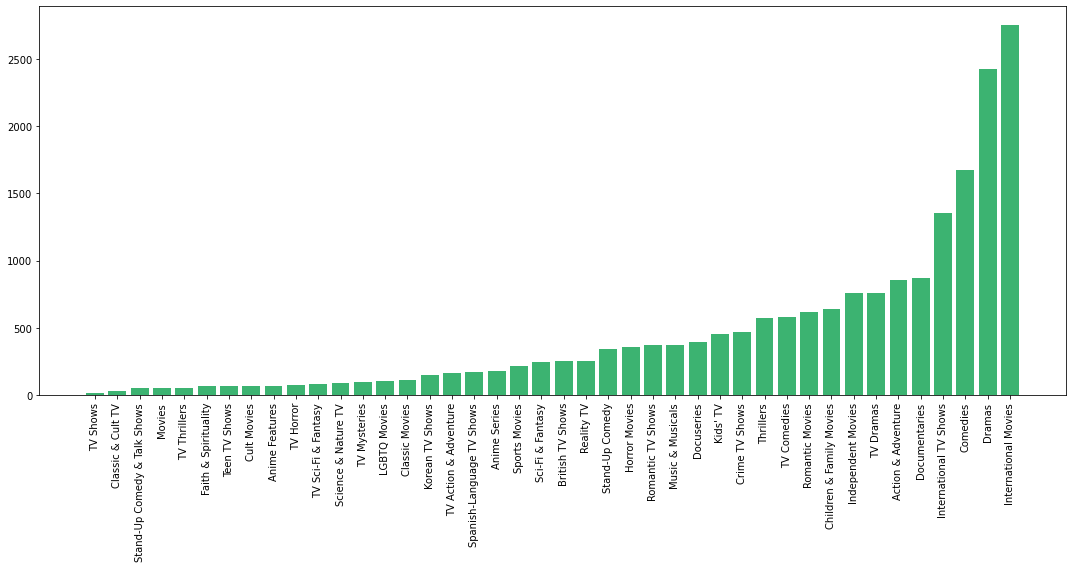

In [643]:
dict_columns_cat(df['Genres'])
sorted_dic(df['Genres'])
graph(df['Genres'])

### MOVIES AND THEIR GENRE

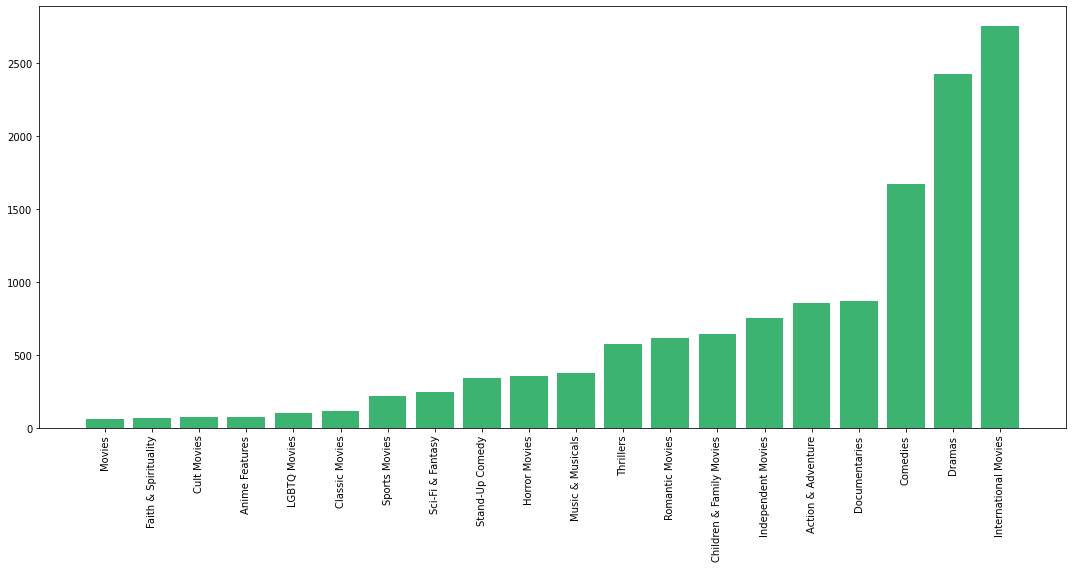

In [644]:
dict_columns_cat(movie['Genres'])
sorted_dic(movie['Genres'])
graph(movie['Genres'])

### TV-SHOWS AND THEIR GENRES

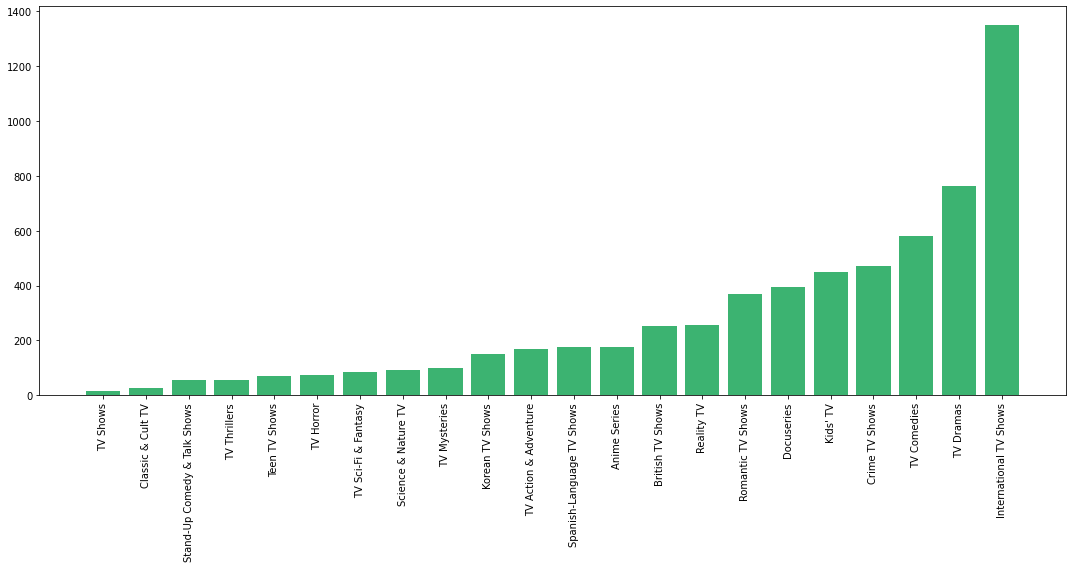

In [645]:
dict_columns_cat(tv_show['Genres'])
sorted_dic(tv_show['Genres'])
graph(tv_show['Genres'])


### SHOW TYPE 

<AxesSubplot:ylabel='Type'>

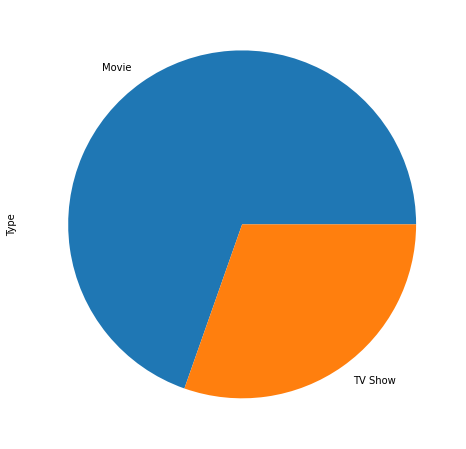

In [646]:
fig = plt.figure(figsize=(8, 8))
df['Type'].value_counts().plot(kind='pie',)

### DIRECTORS

In [647]:
from collections import Counter
def most_common(colmn):
    dt = pd.DataFrame(colmn)
    dt.dropna(inplace=True)
    lis =[]
    for i in dt.iloc[:,0].tolist():
      for j in i.split(','):
        lis.append(j.strip())

    dic = {}
    for i in lis:
      dic[i]=lis.count(i)

    x = Counter(dic)
    a = x.most_common(10)
    return pd.DataFrame(a)

### THE TOP 10 MOST COMMON DIRECTOR 

In [648]:
most_common(df['Director'])

,0,1
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Marcus Raboy,16
5,Jay Karas,15
6,Cathy Garcia-Molina,13
7,Youssef Chahine,12
8,Martin Scorsese,12
9,Jay Chapman,12


### THE TOP 10 MOST COMMON ACTOR 

In [649]:
most_common(df["Cast"])

,0,1
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
5,Rupa Bhimani,31
6,Akshay Kumar,30
7,Om Puri,30
8,Yuki Kaji,29
9,Amitabh Bachchan,28


### Actors and Years 

In [650]:
data = df[df["Release_year"]>=2015]

In [651]:
data

,Type,Title,Director,Cast,Country,Release_year,Genres
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...
8796,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2016,"International TV Shows, TV Dramas"
8797,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2016,Kids' TV
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2015,"Dramas, International Movies, Thrillers"
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,2018,"Kids' TV, Korean TV Shows, TV Comedies"


In [652]:
cst = pd.DataFrame(data["Cast"])
cst.dropna(inplace=True)
lis_recent_cast =[]
for i in cst.iloc[:,0].tolist():
  for j in i.split(','):
    lis_recent_cast.append(j.strip())
len(lis_recent_cast)   

42361

In [653]:
tv_show = df[df['Type']=='TV Show']
movie = df[df['Type']=='Movie']

In [654]:
def most_commonn(colmn):
    dt = pd.DataFrame(colmn)
    dt.dropna(inplace=True)
    lis =[]
    for i in dt.iloc[:,0].tolist():
      for j in i.split(','):
        lis.append(j.strip())

    dic = {}
    for i in lis:
      dic[i]=lis.count(i)

    x = Counter(dic)
    a = x.most_common(5)
    return pd.DataFrame(a)

In [661]:

for i in range(2015,2021):
    year_data = tv_show[tv_show['Release_year']==i]
    print(f"{i}")
    print((most_commonn(year_data['Cast'])))  

2015
                  0  1
0  Yoshimasa Hosoya  3
1    Hiroshi Kamiya  3
2     Ryohei Kimura  2
3    Junichi Suwabe  2
4      Kazuya Nakai  2
2016
                  0  1
0  Takahiro Sakurai  5
1   Hisako Kanemoto  3
2       Daisuke Ono  3
3   Yuichi Nakamura  3
4      Jun Fukuyama  3
2017
                 0  1
0    Kana Hanazawa  3
1  Kazuhiro Yamaji  3
2  Tomokazu Sugita  3
3      Tara Strong  3
4        Matt Hill  3
2018
                  0  1
0         Ai Kayano  5
1      Vincent Tong  4
2  Takahiro Sakurai  4
3   Takehito Koyasu  4
4     Diego Vásquez  3
2019
               0  1
0   Vincent Tong  4
1  Kathleen Barr  4
2    Steven Yeun  3
3   Lee Jun-hyuk  3
4  Kim Sun-young  3
2020
                    0  1
0    Takahiro Sakurai  4
1        Um Sang-hyun  3
2          Kate Walsh  3
3           Greg Chun  3
4  Alexandre Willaume  3


### Netflix can work with Takahiro Sakurai,vincent tong for directorship 

In [656]:
for i in range(2015,2021):
    year_data = movie[movie['Release_year']==i]
    print(f"{i}")
    print((most_commonn(year_data['Cast'])))       

2015
                0  1
0    James Franco  5
1  Susan Sarandon  4
2         Prabhas  4
3  Rana Daggubati  4
4  Anushka Shetty  4
2016
                 0  1
0  Michael Shannon  5
1       Kim Coates  5
2   Patrick Wilson  4
3     Yograj Singh  4
4    Alfred Molina  4
2017
                  0  1
0     Craig Sechler  6
1  Mohammed Tharwat  5
2           Indrans  5
3     Sunil Sukhada  5
4   Pankaj Tripathi  4
2018
                  0  1
0      Radhika Apte  6
1      Rupa Bhimani  6
2     Julie Tejwani  6
3  Jigna Bharadhwaj  6
4       Rajesh Kawa  6
2019
                     0  1
0        Toyin Abraham  5
1  Nawazuddin Siddiqui  5
2      Tiffany Haddish  5
3        Bayoumi Fouad  4
4         Shaffy Bello  4
2020
                     0  1
0  Blossom Chukwujekwu  6
1        Toyin Abraham  5
2      Michelle Buteau  5
3        Rob Rackstraw  5
4        Keith Wickham  5


-  Blossom Chukwujekwu ,Toyin Abraham has highest number of movies jump in the recent time .


## Observations :

NETFLIX CAN INCREASE ITS OVERALL CUSTOMERS BY FOCUSING ON FOLLOWING GENRES IN DIFFERENT SHOW TYPES:
- The overall top 5 genre  are:
     - International Movies
     - Dramas
     - Comedies
     - International TV shows 
     - Documentries
- The top 5 genre in TV-shows are:
     - Kids TV
     - Crime TV shows
     - TV comedies
     - TV Dramas
     - International TV shows 
- The top 5 genre in Movies section are :     
     - Action $ Adventure
     - Documentries
     - Comedies
     - Dramas
     - International Movies  

#### THE TOP 5 DIRECTORS WITH MOST NUMBER OF MOVIES ARE :
  - Rajiv Chilaka 	: 22
	- Jan Suter	      : 21
  -	Raúl Campos	    : 19
  -	Suhas Kadav	    : 16
  -	Marcus Raboy	  : 16
  -	Jay Karas	      : 15
  